# ANUPRIYA GUPTA

## THE SPARKS FOUNDATION : Create a decision tree classifier and visualize it graphically

### TASK 6

CLASSIFIER - A classifier algorithm is used to map input data to a target variable through decision rules which can be used to predict what characteristics are associated with a specific class or target.

DECISION TREE - A decision tree is a tree like structure whereby an internal node represent an attribute, a branch represents a decicion rule, and the leaf nodes represent an outcome.

## STEP 1 : IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## STEP 2 : READING THE DATA and EDA

In [2]:
iris = pd.read_csv('Iris.csv')

iris.head(5)

,sepal.length,sepal.width,petal.length,petal.width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


#### Data type of each featuers and labels

Note that label (species/class) vector  has type object (String). This will be encoded into numerical value before it can be used to train classifier.

In [3]:
iris.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
Species          object
dtype: object

#### Count Number of samples for each species (class)

In [4]:
iris.Species.value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: Species, dtype: int64

## STEP3 : ENCODING LABELS AS CATEGORIES AND  TRAIN TEST SPLIT
- Data type of labels are changed to `category` type. Then corresponding codes are assigned to each category. Here, Iris-setosa is mapped to 0;Iris-versicular is mapped to 1; Iris-virginica is mapped to 2. This mapping is done in sequence of occurence of label.
- Encoded data is then split into training and test data in the ratio of 80:20

In [5]:
iris.Species = iris.Species.astype('category').cat.codes

X = iris.iloc[:, 1:-1]; y = iris.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## STEP 4 : Training Decision Tree Classifier
Decision tree classifier is trained with default parameters. That is gini-index is chosen attribute selection measure and splitting is done to maximize change in gini-index.

In [6]:
# Create Instance of Decision Tree Classifier
clf = DecisionTreeClassifier()

# fit model to training data
clf.fit(X_train, y_train) 

DecisionTreeClassifier()

## STEP 5 : Visualizing The Trained Classifier  

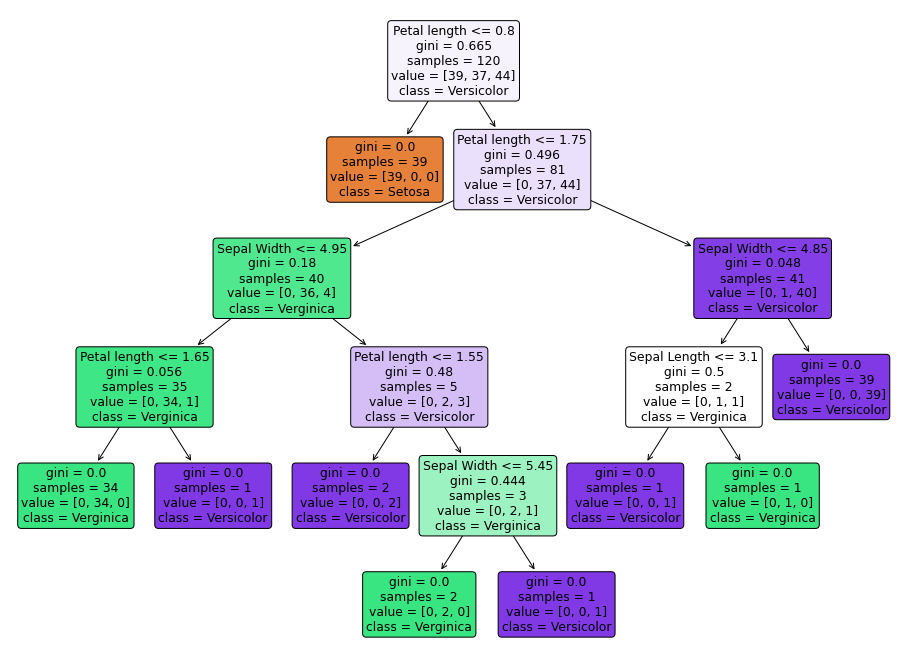

In [7]:
ax = plt.gca()
ax.figure.set_size_inches(16, 12)
plot_tree(clf, rounded="true", filled="true", \
          feature_names=["Sepal Length", "Sepal Width", "Petal length", "Petal Width"], \
          class_names=['Setosa', 'Verginica', 'Versicolor'], \
          ax=ax);

## STEP 6 : Prediction And Model Evaluation

Confusion matrix is used for evaluation of model performance for multi-class classification problem. True labels are predicted against Predicted labels.  Only diagonal entries in confusion matrix represent 100% model accuracy or no misclassification.

In [8]:
y_pred = clf.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix
cf_mat =confusion_matrix(y_test, y_pred)

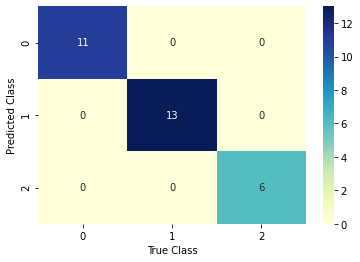

In [10]:
ax = sns.heatmap(cf_mat, annot=True, cmap="YlGnBu");
ax.set_xlabel("True Class");
ax.set_ylabel("Predicted Class");

from confusion matrix observe that trained decision tree classifier is able to predict all classes accurately on unseen data (test data).

#### Thank you